# Checkpoint 3
---

# Modelo preditivo

## Base MapBiomas
### Análise - Desmatamento no Brasil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Substitua pelo caminho para o seu arquivo
file_path = "MapBiomas-Tabela_de_Dados.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

                                 Classe  1986       1987       1988     1989  \
0    1. Supressão de Vegetação Primária   NaN  7308931.0  6432726.0  5749646   
1  2. Supressão de Vegetação Secundária   NaN        NaN        NaN   112426   

      1990     1991     1992     1993     1994  ...     2014     2015  \
0  4921199  4792157  5116605  4571184  4867557  ...  2329397  2437064   
1   206150   379203   616211   706388   808803  ...  1424841  1478782   

      2016     2017     2018     2019     2020     2021     2022     2023  
0  2365136  2141748  2259905  2985170  2941241  3409599  3608005  2480731  
1  1472338  1342547  1453311  1588832  1511754  1655177  1934253   957946  

[2 rows x 39 columns]


In [3]:
# Informações gerais sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Classe  2 non-null      object 
 1   1986    0 non-null      float64
 2   1987    1 non-null      float64
 3   1988    1 non-null      float64
 4   1989    2 non-null      int64  
 5   1990    2 non-null      int64  
 6   1991    2 non-null      int64  
 7   1992    2 non-null      int64  
 8   1993    2 non-null      int64  
 9   1994    2 non-null      int64  
 10  1995    2 non-null      int64  
 11  1996    2 non-null      int64  
 12  1997    2 non-null      int64  
 13  1998    2 non-null      int64  
 14  1999    2 non-null      int64  
 15  2000    2 non-null      int64  
 16  2001    2 non-null      int64  
 17  2002    2 non-null      int64  
 18  2003    2 non-null      int64  
 19  2004    2 non-null      int64  
 20  2005    2 non-null      int64  
 21  2006    2 non-null      int64  
 22  2007  

In [4]:
# Verificar estatísticas descritivas
print(data.describe())

       1986       1987       1988          1989          1990          1991  \
count   0.0        1.0        1.0  2.000000e+00  2.000000e+00  2.000000e+00   
mean    NaN  7308931.0  6432726.0  2.931036e+06  2.563674e+06  2.585680e+06   
std     NaN        NaN        NaN  3.986116e+06  3.334043e+06  3.120430e+06   
min     NaN  7308931.0  6432726.0  1.124260e+05  2.061500e+05  3.792030e+05   
25%     NaN  7308931.0  6432726.0  1.521731e+06  1.384912e+06  1.482442e+06   
50%     NaN  7308931.0  6432726.0  2.931036e+06  2.563674e+06  2.585680e+06   
75%     NaN  7308931.0  6432726.0  4.340341e+06  3.742437e+06  3.688918e+06   
max     NaN  7308931.0  6432726.0  5.749646e+06  4.921199e+06  4.792157e+06   

               1992          1993          1994          1995  ...  \
count  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  ...   
mean   2.866408e+06  2.638786e+06  2.838180e+06  3.186965e+06  ...   
std    3.182259e+06  2.732823e+06  2.869972e+06  3.112413e+06  ...   
min    6

In [5]:
# Transpor para formato longo (Ano e Desmatamento como variáveis)
data_long = data.melt(id_vars=["Classe"], 
                      var_name="Ano", 
                      value_name="Desmatamento")

# Converter Ano e Desmatamento para tipos adequados
data_long["Ano"] = pd.to_numeric(data_long["Ano"])
data_long["Desmatamento"] = pd.to_numeric(data_long["Desmatamento"], errors="coerce")

# Verificar os primeiros registros após a transformação
print(data_long.head())

                                 Classe   Ano  Desmatamento
0    1. Supressão de Vegetação Primária  1986           NaN
1  2. Supressão de Vegetação Secundária  1986           NaN
2    1. Supressão de Vegetação Primária  1987     7308931.0
3  2. Supressão de Vegetação Secundária  1987           NaN
4    1. Supressão de Vegetação Primária  1988     6432726.0


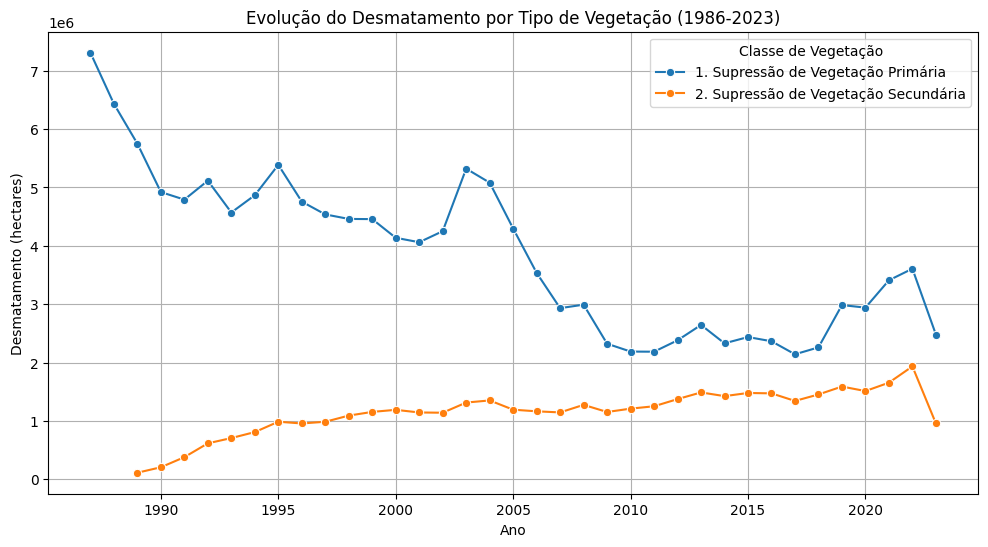

In [10]:
# Selecionar dados para vegetação primária e secundária
desmatamento_primaria_secundaria = data_long[data_long["Classe"].isin(["1. Supressão de Vegetação Primária", "2. Supressão de Vegetação Secundária"])]

# Plotar série temporal do desmatamento para primária e secundária
plt.figure(figsize=(12, 6))
sns.lineplot(data=desmatamento_primaria_secundaria, x="Ano", y="Desmatamento", hue="Classe", marker="o")
plt.title("Evolução do Desmatamento por Tipo de Vegetação (1986-2023)")
plt.xlabel("Ano")
plt.ylabel("Desmatamento (hectares)")
plt.grid()
plt.legend(title="Classe de Vegetação")
plt.show()

In [40]:
# Agrupar os dados por ano e somar os valores de desmatamento
dados_agrupados = data_long.groupby('Ano')['Desmatamento'].sum().reset_index()

# Dividir os dados em treino (até 2020) e teste (2021–2023)
dados_treino = dados_agrupados[dados_agrupados['Ano'] <= 2020]
dados_teste = dados_agrupados[(dados_agrupados['Ano'] >= 2021) & (dados_agrupados['Ano'] <= 2023)]

# Mostrar os dados agrupados
print("Dados Agrupados:")
print(dados_agrupados.head())

# Mostrar os dados de treino e teste
print("\nDados de Treino:")
print(dados_treino.tail())

print("\nDados de Teste:")
print(dados_teste)

Dados Agrupados:
    Ano  Desmatamento
0  1986           0.0
1  1987     7308931.0
2  1988     6432726.0
3  1989     5862072.0
4  1990     5127349.0

Dados de Treino:
     Ano  Desmatamento
30  2016     3837474.0
31  2017     3484295.0
32  2018     3713216.0
33  2019     4574002.0
34  2020     4452995.0

Dados de Teste:
     Ano  Desmatamento
35  2021     5064776.0
36  2022     5542258.0
37  2023     3438677.0


Previsões para 2021–2023:
 [4433335.55474038 4419198.79445617 4409033.29951499]
Valores Reais: [5064776. 5542258. 3438677.]
Erro MSE: 867190121024.9414, Erro MAE: 908285.3167728124


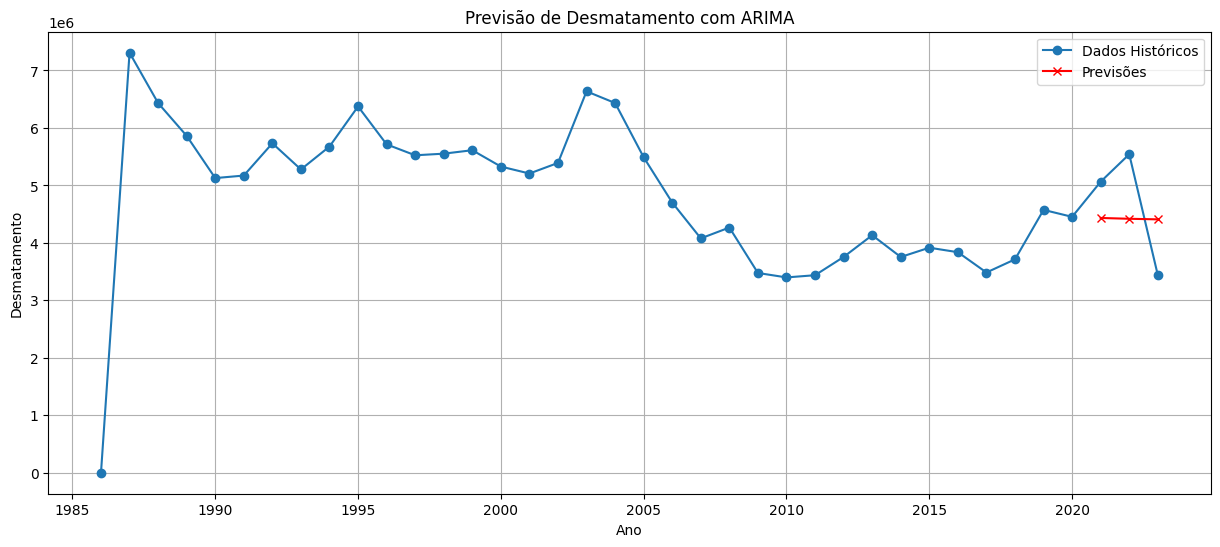

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Treinar o modelo ARIMA
modelo_arima = ARIMA(dados_treino['Desmatamento'], order=(1, 1, 1))  # Ordem (p, d, q)
resultado_arima = modelo_arima.fit()

# Fazer previsões para 2021–2023
previsoes = resultado_arima.forecast(steps=3).values

# Comparar com os valores reais
valores_reais = dados_teste['Desmatamento'].values
erro_mse = mean_squared_error(valores_reais, previsoes)
erro_mae = mean_absolute_error(valores_reais, previsoes)

print(f"Previsões para 2021–2023:\n {previsoes}")
print(f"Valores Reais: {valores_reais}")
print(f"Erro MSE: {erro_mse}, Erro MAE: {erro_mae}")

# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(dados_agrupados['Ano'], dados_agrupados['Desmatamento'], label='Dados Históricos', marker='o')
plt.plot(dados_teste['Ano'], previsoes, label='Previsões', marker='x', color='red')
plt.title('Previsão de Desmatamento com ARIMA')
plt.xlabel('Ano')
plt.ylabel('Desmatamento')
plt.legend()
plt.grid(True)
plt.show()

## Base SEEG

In [43]:
file_path = "SEEG.csv"

# Carregar o arquivo Excel
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para explorar o conteúdo
print(data.head())

      Categoria          1990          1991          1992          1993  \
0          Pará  3.713604e+08  3.456612e+08  4.887939e+08  3.903480e+08   
1   Mato Grosso  2.991454e+08  3.080704e+08  4.123194e+08  3.959249e+08   
2      Maranhão  1.551959e+08  1.437850e+08  2.037116e+08  1.642882e+08   
3  Minas Gerais  1.718919e+08  1.803260e+08  1.676099e+08  1.711714e+08   
4     São Paulo  1.188844e+08  1.254230e+08  1.220580e+08  1.254794e+08   

           1994          1995          1996          1997          1998  ...  \
0  4.096926e+08  5.709845e+08  4.608000e+08  5.624068e+08  4.809973e+08  ...   
1  5.462023e+08  6.462798e+08  5.358809e+08  5.237706e+08  5.331691e+08  ...   
2  1.526168e+08  1.432679e+08  1.394976e+08  1.288871e+08  1.897565e+08  ...   
3  1.590313e+08  1.647119e+08  1.593408e+08  1.634456e+08  1.568034e+08  ...   
4  1.377703e+08  1.401017e+08  1.388923e+08  1.400873e+08  1.409485e+08  ...   

           2014          2015          2016          2017          2

In [44]:
# Transpor para formato longo
data_long = data.melt(id_vars=["Categoria"], 
                      var_name="Ano", 
                      value_name="Emissao")

# Converter Ano e Emissao para tipos adequados
data_long["Ano"] = pd.to_numeric(data_long["Ano"])
data_long["Emissao"] = pd.to_numeric(data_long["Emissao"], errors="coerce")

# Verificar os primeiros registros após a transformação
print(data_long.head())

      Categoria   Ano       Emissao
0          Pará  1990  3.713604e+08
1   Mato Grosso  1990  2.991454e+08
2      Maranhão  1990  1.551959e+08
3  Minas Gerais  1990  1.718919e+08
4     São Paulo  1990  1.188844e+08


In [57]:
# Agrupar os dados por ano e somar os valores de desmatamento
dados_agrupados = data_long.groupby('Ano')['Emissao'].sum().reset_index()

# Dividir os dados em treino (até 2020) e teste (2021–2023)
dados_treino = dados_agrupados[dados_agrupados['Ano'] <= 2020]
dados_teste = dados_agrupados[(dados_agrupados['Ano'] >= 2021) & (dados_agrupados['Ano'] <= 2023)]

# Mostrar os dados agrupados
print("Dados Agrupados:")
print(dados_agrupados.head())

# Mostrar os dados de treino e teste
print("\nDados de Treino:")
print(dados_treino.tail())

print("\nDados de Teste:")
print(dados_teste)

Dados Agrupados:
    Ano       Emissao
0  1990  2.114884e+09
1  1991  2.155478e+09
2  1992  2.490570e+09
3  1993  2.299416e+09
4  1994  2.495230e+09

Dados de Treino:
     Ano       Emissao
26  2016  2.110837e+09
27  2017  2.000646e+09
28  2018  2.025039e+09
29  2019  2.336864e+09
30  2020  2.246478e+09

Dados de Teste:
     Ano       Emissao
31  2021  2.590054e+09
32  2022  2.607026e+09
33  2023  2.295614e+09


Previsões para 2021–2023:
 [2.25301355e+09 2.24903514e+09 2.25145683e+09]
Valores Reais: [2.59005383e+09 2.60702619e+09 2.29561418e+09]
Erro MSE: 8.12345399526283e+16, Erro MAE: 246396230.59573284


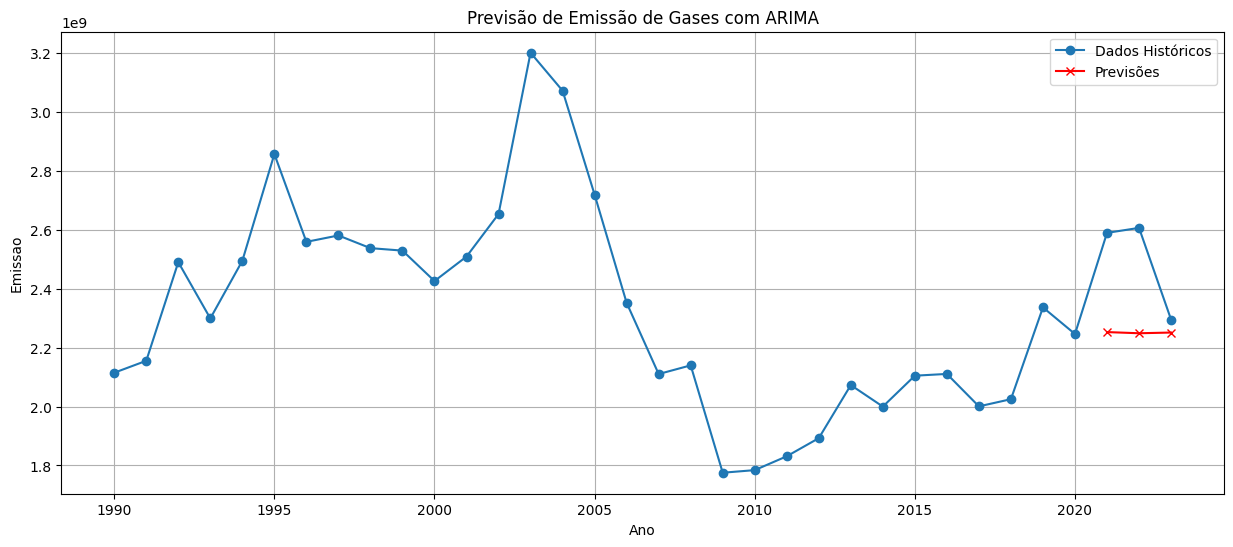

In [59]:
# Treinar o modelo ARIMA
modelo_arima = ARIMA(dados_treino['Emissao'], order=(1, 1, 1))  # Ordem (p, d, q)
resultado_arima = modelo_arima.fit()

# Fazer previsões para 2021–2023
previsoes = resultado_arima.forecast(steps=3).values

# Comparar com os valores reais
valores_reais = dados_teste['Emissao'].values
erro_mse = mean_squared_error(valores_reais, previsoes)
erro_mae = mean_absolute_error(valores_reais, previsoes)

print(f"Previsões para 2021–2023:\n {previsoes}")
print(f"Valores Reais: {valores_reais}")
print(f"Erro MSE: {erro_mse}, Erro MAE: {erro_mae}")

# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(dados_agrupados['Ano'], dados_agrupados['Emissao'], label='Dados Históricos', marker='o')
plt.plot(dados_teste['Ano'], previsoes, label='Previsões', marker='x', color='red')
plt.title('Previsão de Emissão de Gases com ARIMA')
plt.xlabel('Ano')
plt.ylabel('Emissao')
plt.legend()
plt.grid(True)
plt.show()